In [6]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior_glm.glm import GLM
from visual_behavior.data_access import loading
import pandas as pd
import seaborn as sns
import numpy as np
import time
import os

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/allen/programs/braintv/workgroups/nc-ophys/Doug/code/AllenSDK/allensdk/brain_observatory/session_api_utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
basepath = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/single_cell_metrics/cell_metrics'
pd.read_csv(os.path.join(basepath, 'experiment_id_960410023.csv'))

,Unnamed: 0,cell_specimen_id,condition,events,index,ophys_experiment_id,ophys_session_id,session_subset,stimuli,value,variable
0,0,1086613265,changes,True,0.0,960410023,959458018,engaged,all_images,im075,pref_image
1,1,1086613265,changes,True,1.0,960410023,959458018,engaged,all_images,im075,pref_image
2,2,1086613510,changes,True,2.0,960410023,959458018,engaged,all_images,im073,pref_image
3,3,1086613510,changes,True,3.0,960410023,959458018,engaged,all_images,im073,pref_image
4,4,1086614512,changes,True,4.0,960410023,959458018,engaged,all_images,im106,pref_image
...,...,...,...,...,...,...,...,...,...,...,...
3731,83,1086619270,full_trace,False,NaN,960410023,959458018,full_session,None,1.235446949304885e-05,population_coupling_p_value
3732,84,1086613265,full_trace,False,NaN,960410023,959458018,full_session,None,2.586543439591748e-106,population_coupling_p_value
3733,85,1086613510,full_trace,False,NaN,960410023,959458018,full_session,None,7.75363516229789e-25,population_coupling_p_value
3734,86,1086616398,full_trace,False,NaN,960410023,959458018,full_session,None,7.580380990977304e-213,population_coupling_p_value


In [4]:
pd.read_hdf(os.path.join(basepath, 'experiment_id_960410023.h5'))

,cell_specimen_id,condition,events,metric,ophys_experiment_id,ophys_session_id,session_subset,stimuli,value,variable
0,1086613265,changes,True,pref_image,960410023,959458018,engaged,all_images,im054,NaN
1,1086613510,changes,True,pref_image,960410023,959458018,engaged,all_images,im073,NaN
2,1086614512,changes,True,pref_image,960410023,959458018,engaged,all_images,im106,NaN
3,1086614819,changes,True,pref_image,960410023,959458018,engaged,all_images,im054,NaN
4,1086615201,changes,True,pref_image,960410023,959458018,engaged,all_images,im031,NaN
...,...,...,...,...,...,...,...,...,...,...
83,1086619270,full_trace,False,NaN,960410023,959458018,full_session,None,0.000012,population_coupling_p_value
84,1086613265,full_trace,False,NaN,960410023,959458018,full_session,None,0.0,population_coupling_p_value
85,1086613510,full_trace,False,NaN,960410023,959458018,full_session,None,0.0,population_coupling_p_value
86,1086616398,full_trace,False,NaN,960410023,959458018,full_session,None,0.0,population_coupling_p_value


In [5]:
pd.read_hdf(os.path.join(basepath, 'experiment_id_909177759_traces_none_full_session_dFF.h5'))

,cell_specimen_id,robust_signal,robust_noise,robust_snr,trace_max,trace_mean,trace_var,trace_std,trace_max_over_std,trace_mean_over_std,population_coupling_r_value,population_coupling_p_value,ophys_experiment_id,ophys_session_id,condition,session_subset,stimuli,events
0,1086569523,0.140724,0.095111,1.479574,1.168315,0.004028,0.009730,0.098639,11.844393,0.040840,0.115530,4.037396e-143,909177759,908441202,full_trace,full_session,None,False
1,1086528727,0.174436,0.117876,1.479825,1.391609,0.004977,0.015505,0.124519,11.175907,0.039969,0.107750,1.202359e-124,909177759,908441202,full_trace,full_session,None,False
2,1086534200,0.154789,0.101614,1.523309,1.682543,0.007857,0.014588,0.120781,13.930532,0.065053,0.098957,2.410387e-105,909177759,908441202,full_trace,full_session,None,False
3,1086570950,0.243118,0.162659,1.494649,1.560237,0.006787,0.030072,0.173414,8.997198,0.039139,0.088327,3.096791e-84,909177759,908441202,full_trace,full_session,None,False
4,1086545361,0.199291,0.122336,1.629052,1.848038,0.021501,0.027920,0.167094,11.059895,0.128677,0.222207,0.000000e+00,909177759,908441202,full_trace,full_session,None,False
5,1086587643,0.151268,0.102172,1.480532,1.359302,0.004103,0.011263,0.106127,12.808267,0.038660,0.126911,1.598463e-172,909177759,908441202,full_trace,full_session,None,False
6,1086537796,0.188649,0.093309,2.021763,4.164245,0.059211,0.077275,0.277983,14.980193,0.213001,0.209139,0.000000e+00,909177759,908441202,full_trace,full_session,None,False
7,1086538644,0.099954,0.065401,1.528315,1.611533,0.005982,0.006687,0.081777,19.706549,0.073149,0.210148,0.000000e+00,909177759,908441202,full_trace,full_session,None,False
8,1086554116,0.095529,0.064798,1.474258,0.689691,0.003034,0.004675,0.068372,10.087397,0.044369,0.163416,3.420660e-286,909177759,908441202,full_trace,full_session,None,False
9,1086536830,0.115783,0.078451,1.475877,1.096049,0.003194,0.006964,0.083451,13.133991,0.038272,0.140825,2.422458e-212,909177759,908441202,full_trace,full_session,None,False


In [7]:
versions = [
    '12_dff_L2_optimize_by_session',
    '15_events_L2_optimize_by_session'
]
results = {}
for version in versions:
    t0 = time.time()
    results[version] = gat.retrieve_results({'glm_version':version})
    print('loading results for {} took {} seconds'.format(version, time.time() - t0))

loading results for 12_dff_L2_optimize_by_session took 39.51854968070984 seconds
loading results for 15_events_L2_optimize_by_session took 34.52396368980408 seconds


In [14]:
cell_tables = []
oeids = results['12_dff_L2_optimize_by_session']['ophys_experiment_id'].unique()
for ii, oeid in enumerate(oeids):
    print('loading {}, # {} of {}      '.format(oeid, ii+1, len(oeids)), end = '\r')
    cell_tables.append(pd.read_hdf(os.path.join(basepath, 'experiment_id_{}_traces_none_full_session_dFF.h5'.format(oeid))))

In [18]:
cell_metrics_table = pd.concat(cell_tables)

In [16]:
len(results['12_dff_L2_optimize_by_session'])

66253

In [17]:
len(results['15_events_L2_optimize_by_session'])

66276

In [23]:
cell_metrics_table.sample(5)

,cell_specimen_id,robust_signal,robust_noise,robust_snr,trace_max,trace_mean,trace_var,trace_std,trace_max_over_std,trace_mean_over_std,population_coupling_r_value,population_coupling_p_value,ophys_experiment_id,ophys_session_id,condition,session_subset,stimuli,events
21,1086563130,0.227978,0.149635,1.523564,2.684568,0.012512,0.029266,0.171074,15.692465,0.073139,0.196758,0.0,917820370,917498735,full_trace,full_session,None,False
153,1086527680,0.122913,0.082200,1.495283,1.051661,0.004195,0.007801,0.088323,11.906960,0.047494,0.175321,0.0,892799212,892217026,full_trace,full_session,None,False
23,1086522422,0.121734,0.080022,1.521268,1.260374,0.006777,0.009150,0.095657,13.175971,0.070846,0.131998,0.0,898747791,898295293,full_trace,full_session,None,False
31,1086533094,0.127779,0.085451,1.495341,1.775306,0.005389,0.009349,0.096689,18.361006,0.055738,0.168969,0.0,929591721,929255931,full_trace,full_session,None,False
13,1086568315,0.160778,0.102522,1.568234,3.290531,0.016102,0.023314,0.152688,21.550642,0.105457,0.527026,0.0,1006511150,1006419624,full_trace,full_session,None,False


In [22]:
merged_results_12_dff = results['12_dff_L2_optimize_by_session'].merge(
    cell_metrics_table,
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
)
merged_results_12_dff.sample(5)

,_id,cell_specimen_id,Full__avg_cv_var_train,Full__avg_cv_var_test,Full__avg_cv_var_test_full_comparison,Full__avg_cv_adjvar_train,Full__avg_cv_adjvar_test,Full__avg_cv_adjvar_test_full_comparison,Full__absolute_change_from_full,Full__adj_dropout,Full__dropout,intercept__avg_cv_var_train,intercept__avg_cv_var_test,intercept__avg_cv_var_test_full_comparison,intercept__avg_cv_adjvar_train,intercept__avg_cv_adjvar_test,intercept__avg_cv_adjvar_test_full_comparison,intercept__absolute_change_from_full,intercept__adj_dropout,intercept__dropout,time__avg_cv_var_train,time__avg_cv_var_test,time__avg_cv_var_test_full_comparison,time__avg_cv_adjvar_train,time__avg_cv_adjvar_test,time__avg_cv_adjvar_test_full_comparison,time__absolute_change_from_full,time__adj_dropout,time__dropout,omissions__avg_cv_var_train,omissions__avg_cv_var_test,omissions__avg_cv_var_test_full_comparison,omissions__avg_cv_adjvar_train,omissions__avg_cv_adjvar_test,omissions__avg_cv_adjvar_test_full_comparison,omissions__absolute_change_from_full,omissions__adj_dropout,omissions__dropout,running__avg_cv_var_train,running__avg_cv_var_test,running__avg_cv_var_test_full_comparison,running__avg_cv_adjvar_train,running__avg_cv_adjvar_test,running__avg_cv_adjvar_test_full_comparison,running__absolute_change_from_full,running__adj_dropout,running__dropout,pupil__avg_cv_var_train,pupil__avg_cv_var_test,pupil__avg_cv_var_test_full_comparison,pupil__avg_cv_adjvar_train,pupil__avg_cv_adjvar_test,pupil__avg_cv_adjvar_test_full_comparison,pupil__absolute_change_from_full,pupil__adj_dropout,pupil__dropout,face_motion_PC_0__avg_cv_var_train,face_motion_PC_0__avg_cv_var_test,face_motion_PC_0__avg_cv_var_test_full_comparison,face_motion_PC_0__avg_cv_adjvar_train,face_motion_PC_0__avg_cv_adjvar_test,face_motion_PC_0__avg_cv_adjvar_test_full_comparison,face_motion_PC_0__absolute_change_from_full,face_motion_PC_0__adj_dropout,face_motion_PC_0__dropout,face_motion_PC_1__avg_cv_var_train,face_motion_PC_1__avg_cv_var_test,face_motion_PC_1__avg_cv_var_test_full_comparison,face_motion_PC_1__avg_cv_adjvar_train,face_motion_PC_1__avg_cv_adjvar_test,face_motion_PC_1__avg_cv_adjvar_test_full_comparison,face_motion_PC_1__absolute_change_from_full,face_motion_PC_1__adj_dropout,face_motion_PC_1__dropout,face_motion_PC_2__avg_cv_var_train,face_motion_PC_2__avg_cv_var_test,face_motion_PC_2__avg_cv_var_test_full_comparison,face_motion_PC_2__avg_cv_adjvar_train,face_motion_PC_2__avg_cv_adjvar_test,face_motion_PC_2__avg_cv_adjvar_test_full_comparison,face_motion_PC_2__absolute_change_from_full,face_motion_PC_2__adj_dropout,face_motion_PC_2__dropout,face_motion_PC_3__avg_cv_var_train,face_motion_PC_3__avg_cv_var_test,face_motion_PC_3__avg_cv_var_test_full_comparison,face_motion_PC_3__avg_cv_adjvar_train,face_motion_PC_3__avg_cv_adjvar_test,face_motion_PC_3__avg_cv_adjvar_test_full_comparison,face_motion_PC_3__absolute_change_from_full,face_motion_PC_3__adj_dropout,face_motion_PC_3__dropout,face_motion_PC_4__avg_cv_var_train,face_motion_PC_4__avg_cv_var_test,face_motion_PC_4__avg_cv_var_test_full_comparison,face_motion_PC_4__avg_cv_adjvar_train,face_motion_PC_4__avg_cv_adjvar_test,face_motion_PC_4__avg_cv_adjvar_test_full_comparison,face_motion_PC_4__absolute_change_from_full,face_motion_PC_4__adj_dropout,face_motion_PC_4__dropout,image0__avg_cv_var_train,image0__avg_cv_var_test,image0__avg_cv_var_test_full_comparison,image0__avg_cv_adjvar_train,image0__avg_cv_adjvar_test,image0__avg_cv_adjvar_test_full_comparison,image0__absolute_change_from_full,image0__adj_dropout,image0__dropout,image1__avg_cv_var_train,image1__avg_cv_var_test,image1__avg_cv_var_test_full_comparison,image1__avg_cv_adjvar_train,image1__avg_cv_adjvar_test,image1__avg_cv_adjvar_test_full_comparison,image1__absolute_change_from_full,image1__adj_dropout,image1__dropout,image2__avg_cv_var_train,image2__avg_cv_var_test,image2__avg_cv_var_test_full_comparison,image2__avg_cv_adjvar_train,image2__avg_cv_adjvar_test,image2__avg_cv_adjvar_tes

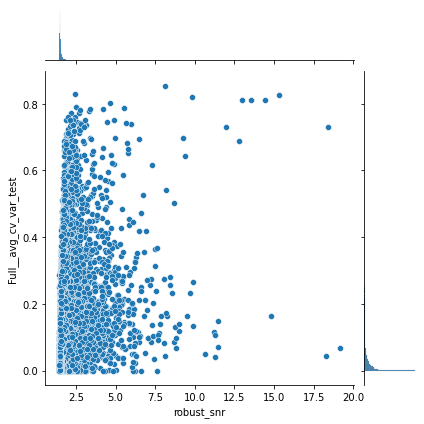

In [34]:
sns.jointplot(
    data = merged_results_12_dff.dropna(subset = ['robust_snr','robust_noise']),
    x='robust_snr',
    y='Full__avg_cv_var_test',
)

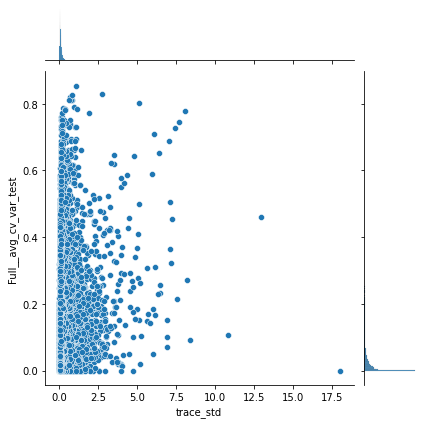

In [36]:
sns.jointplot(
    data = merged_results_12_dff.dropna(subset = ['robust_snr','robust_noise']),
    x='trace_std',
    y='Full__avg_cv_var_test',
)

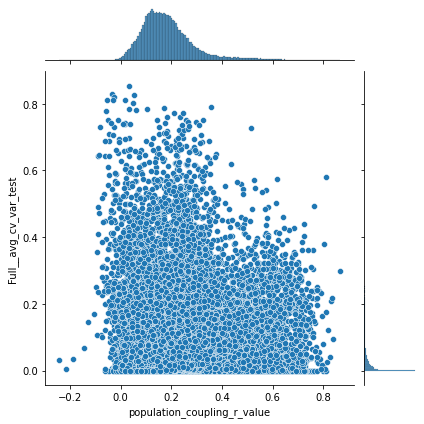

In [40]:
sns.jointplot(
    data = merged_results_12_dff.dropna(subset = ['robust_snr','robust_noise']),
    x='population_coupling_r_value',
    y='Full__avg_cv_var_test',
)